# Handwritten Digit Recognizer using CNN 

### Dataset - mnist dataset

Import libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

import MNIST dataset

In [2]:
# load the dataset
((X_train, y_train),(X_test, y_test)) = tf.keras.datasets.mnist.load_data()

In [3]:
#check the shape of datasets 
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
X_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [4]:
# reshape datasets
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [5]:
# change the data type 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
# Normalizing the datasets
X_train = X_train/255
X_test = X_test/255

Build the model

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense , MaxPooling2D, Dropout, Flatten
# Build CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

fit the model

In [8]:
# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x=X_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2946 - accuracy: 0.9068
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0433 - accuracy: 0.9867
Epoch 3/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0290 - accuracy: 0.9918
Epoch 4/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0193 - accuracy: 0.9937
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0164 - accuracy: 0.9951
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0113 - accuracy: 0.9965
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0115 - accuracy: 0.9961
Epoch 8/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0075 - accuracy: 0.9976
Epoch 9/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0080 - accuracy: 0.99770s - loss: 0.0080 - ac
Epoch 10/10
1875/1875 [===================

In [9]:
score = model.evaluate(X_test, y_test)         # evaluate loss and accuracy for test set
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0401 - accuracy: 0.9910
Test loss: 0.040138717740774155
Test accuracy: 0.9909999966621399


In [10]:
# save model
model.save('mnist.h5')

In [11]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

def load_image(filename):                                               #load image function for import the image 
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    img = img_to_array(img)
    img = img.reshape(1, 28, 28, 1)
    img = img.astype('float32')
    img = img / 255.0
    return img

checking the prediction 

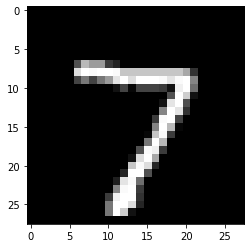

In [12]:
path = "C:/Users/omprakash/Downloads/7.png"
img = load_img(path, target_size=(28, 28))
plt.imshow(img)

In [14]:
model = tf.keras.models.load_model('mnist.h5')
image = load_image(path)
digit = model.predict_classes(image)

C:\Users\omprakash\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
C:\Users\omprakash\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [15]:
print("Predicted digit:", digit[0])

Predicted digit: 7


### Thank You